# HOUSE PRICE PREDICTION MODEL

### Dataset used - Banglore City

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from pandas.plotting import scatter_matrix
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.tree import DecisionTreeClassifier

(-7.0833333333332575, 140.37878787878788)
estimated coefficients : 
b0 = -7.0833333333332575 
b1= 140.37878787878788


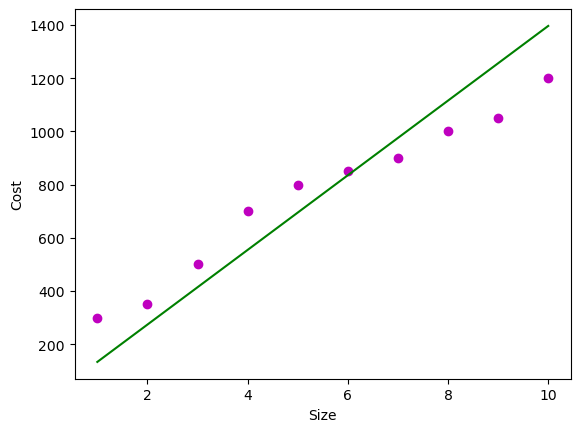

In [3]:
def estimate_coefficient(x,y):
    n = np.size(x)
    x_mean, y_mean = np.mean(x), np.mean(y)
    SS_xy = np.sum(y*x - n*x_mean*y_mean)    # formula for sumof squared errors in statistics
    SS_xx = np.sum(x*x - n*x_mean*x_mean)     # for finding the slope
    #finding regression coefficient
    b1 = SS_xy/SS_xx
    b0 = y_mean - b1*x_mean  #equation of regression line y=mx+c ; m=b1 ; c=b0
    return b0,b1
def plot_regression_line(x,y,b):
    plt.scatter(x,y, color='m', marker='o')
    #predicted response vector
    y_pred = b[1]*x+b[0]
    plt.plot(x,y_pred, color='g')
    plt.xlabel('Size')
    plt.ylabel('Cost')
    plt.show()

x = np.array([1,2,3,4,5,6,7,8,9,10])
y = np.array([300,350,500,700,800,850,900,1000,1050,1200])
b=estimate_coefficient(x,y)
print(b)
print("estimated coefficients : \nb0 = {} \nb1= {}".format(b[0],b[1]))
plot_regression_line(x,y,b)

In [4]:
# LINEAR REGRESSION USING BANGLORE HOUSE PRICES DATASET


### SIMPLE LINEAR REGRESSION MODEL WITH ONE INDEPENDENT VARIABLE

In [5]:
data = pd.read_csv("/Users/karthiksagar/documents/Bangalore.csv")
data.head(10)

,Price,Area,Location,No. of Bedrooms,Resale,MaintenanceStaff,Gymnasium,SwimmingPool,LandscapedGardens,JoggingTrack,...,LiftAvailable,BED,VaastuCompliant,Microwave,GolfCourse,TV,DiningTable,Sofa,Wardrobe,Refrigerator
0,30000000,3340,JP Nagar Phase 1,4,0,1,1,1,1,1,...,1,0,0,0,0,0,0,0,0,0
1,7888000,1045,Dasarahalli on Tumkur Road,2,0,0,1,1,1,1,...,1,0,1,0,0,0,0,0,0,0
2,4866000,1179,Kannur on Thanisandra Main Road,2,0,0,1,1,1,1,...,1,0,0,0,0,0,0,0,0,0
3,8358000,1675,Doddanekundi,3,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
4,6845000,1670,Kengeri,3,0,1,1,1,1,1,...,1,0,0,0,0,0,0,0,0,0
5,6797000,1220,Horamavu,2,0,0,1,1,1,1,...,1,0,0,0,0,0,0,0,0,0
6,20000000,2502,Thanisandra,4,0,0,1,1,1,1,...,1,0,1,0,0,0,0,0,0,0
7,7105000,1438,Ramamurthy Nagar,3,0,0,1,0,0,1,...,1,0,1,0,0,0,0,0,0,0
8,8405000,1405,Whitefield Hope Farm Junction,3,0,0,1,1,1,1,...,0,0,1,0,0,0,0,0,0,0
9,3506000,660,Electronic City Phase 1,1,0,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0


In [6]:
data.describe()

,Price,Area,No. of Bedrooms,Resale,MaintenanceStaff,Gymnasium,SwimmingPool,LandscapedGardens,JoggingTrack,RainWaterHarvesting,...,LiftAvailable,BED,VaastuCompliant,Microwave,GolfCourse,TV,DiningTable,Sofa,Wardrobe,Refrigerator
count,6.207000e+03,6207.000000,6207.000000,6207.000000,6207.000000,6207.000000,6207.000000,6207.000000,6207.000000,6207.000000,...,6207.000000,6207.000000,6207.000000,6207.000000,6207.000000,6207.000000,6207.000000,6207.000000,6207.000000,6207.000000
mean,1.058510e+07,1526.094248,2.556952,0.078782,6.208797,6.461576,6.436121,6.382471,6.396649,6.373933,...,6.438537,6.211052,6.311100,6.210569,6.181569,6.210569,6.210569,6.210569,6.171097,6.210569
std,1.410943e+07,764.845609,0.694300,0.269420,4.126883,3.752421,3.792567,3.875271,3.853661,3.888204,...,3.788782,4.123761,3.981513,4.124430,4.164294,4.124430,4.124430,4.124430,4.178546,4.124430
min,2.000000e+06,415.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5.000000e+06,1110.000000,2.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,7.368000e+06,1340.000000,3.000000,0.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,...,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000
75%,1.070000e+07,1662.500000,3.000000,0.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,...,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000
max,3.000000e+08,9900.000000,7.000000,1.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,...,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000


In [7]:
data.shape

(6207, 40)

In [8]:
data_ = data.loc[:,['Price','Area']]
_data_ = data_.head(50)
_data_

,Price,Area
0,30000000,3340
1,7888000,1045
2,4866000,1179
3,8358000,1675
4,6845000,1670
5,6797000,1220
6,20000000,2502
7,7105000,1438
8,8405000,1405
9,3506000,660


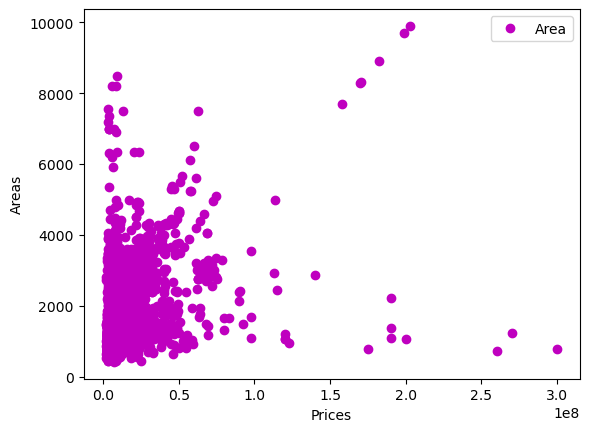

In [9]:
#visualizing variables
data_.plot(x='Price', y='Area', style='o', color='m')
plt.xlabel('Prices')
plt.ylabel('Areas')
plt.show()

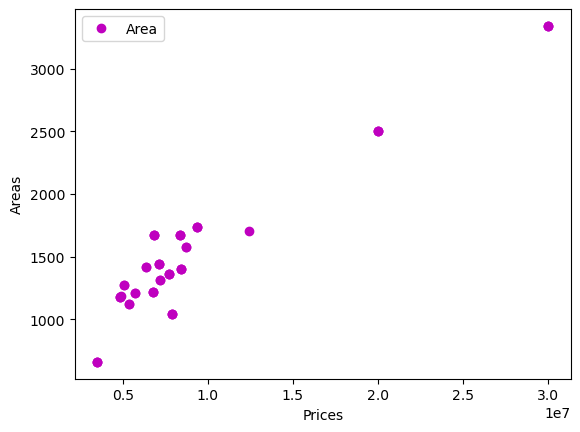

In [10]:
#visualizing variables

_data_.plot(x='Price', y='Area', style='o', color='m')
plt.xlabel('Prices')
plt.ylabel('Areas')
plt.show()

PREPARING DATA

In [21]:
X = pd.DataFrame(_data_['Area'])
Y = pd.DataFrame(_data_['Price'])
X.size,Y.size


(50, 50)

In [22]:
X

,Area
0,3340
1,1045
2,1179
3,1675
4,1670
5,1220
6,2502
7,1438
8,1405
9,660


In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.20, random_state = 1)

In [13]:
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(40, 1)
(40, 1)
(10, 1)
(10, 1)


In [20]:
X_test

,Price
27,3506000
35,5700000
40,4866000
38,30000000
2,4866000
3,8358000
48,7700000
29,9369000
46,8405000
31,5394000


In [14]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train,Y_train)

LinearRegression()

In [15]:
# linear regression is nothing but y=mx+c ; m=slope; c=intercept ; slope is also called coeff

print("c value in y = mx+c is : ", regressor.intercept_)   # c value
print("m value in y = mx+c is : ", regressor.coef_)   # m value

c value in y = mx+c is :  [719.29092108]
m value in y = mx+c is :  [[8.8853821e-05]]


In [16]:
Y_pred = regressor.predict(X_test)
Y_pred = pd.DataFrame(Y_pred, columns=['Predicted'])
Y_pred

,Predicted
0,1030.812418
1,1225.757701
2,1151.653614
3,3384.905552
4,1151.653614
5,1461.931157
6,1403.465343
7,1551.762370
8,1466.107287
9,1198.568432


In [ ]:
regressor.predict()

In [17]:
#finding errors in prediction
from sklearn import metrics
print("Mean Absolute Error: ", metrics.mean_absolute_error(Y_test,Y_pred))
print("Mean SQUARED Error: ", metrics.mean_squared_error(Y_test,Y_pred))
print("ROOT Mean SQUARED Error: ", np.sqrt(metrics.mean_absolute_error(Y_test,Y_pred)))

#from this what we can visualize is : THE LOWER THE VALUE OF ROOT MEAN SQUARED ERROR - 
# THE MORE BETTER IS THE MODEL

Mean Absolute Error:  106.36159763483616
Mean SQUARED Error:  23186.314675110818
ROOT Mean SQUARED Error:  10.313175923780035


In [18]:
from sklearn.metrics import r2_score
r2 = r2_score(Y_test,Y_pred)
print("R2 Score of the model = ", round(r2*100, 3), "%")

R2 Score of the model =  95.001 %


### MULTIPLE LINEAR REGRESSION

In [34]:
dataset = pd.read_csv('Bangalore.csv')
x =  dataset.drop(columns= ['Location'],axis=1).iloc[:,1:].values
y = dataset.iloc[:,0].values

array([[3340,    4,    0, ...,    0,    0,    0],
       [1045,    2,    0, ...,    0,    0,    0],
       [1179,    2,    0, ...,    0,    0,    0],
       ...,
       [1143,    2,    0, ...,    9,    9,    9],
       [1680,    3,    0, ...,    9,    9,    9],
       [1162,    2,    0, ...,    9,    9,    9]])

In [35]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size = 0.20, random_state = 1)

In [47]:
lr = LinearRegression()
lr.fit(X_train, Y_train)

LinearRegression()

In [39]:
pred = lr.predict(X_test)

In [50]:
X_test

array([[5249,    4,    0, ...,    1,    0,    1],
       [ 924,    3,    0, ...,    9,    9,    9],
       [ 950,    2,    0, ...,    9,    9,    9],
       ...,
       [1311,    2,    0, ...,    9,    9,    9],
       [ 950,    2,    0, ...,    9,    9,    9],
       [1024,    2,    0, ...,    9,    9,    9]])

In [41]:
pred = pd.DataFrame(Y_pred, columns=['Predicted'])
pred

,Predicted
0,1030.812418
1,1225.757701
2,1151.653614
3,3384.905552
4,1151.653614
5,1461.931157
6,1403.465343
7,1551.762370
8,1466.107287
9,1198.568432


In [48]:
import joblib

joblib.dump(lr, 'linear_regression_model.pkl')


['linear_regression_model.pkl']

In [49]:
loaded_model = joblib.load('linear_regression_model.pkl')

In [51]:
loaded_model.predict(X_test)

array([41834937.30335248,  4630410.83889705,  7732199.35941837, ...,
       10860793.98270358,  7732199.35941837,  8373517.92485635])